In [6]:
import geopandas as gpd
import pandas as pd
import sqlite3
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import datetime
from tqdm.notebook import tqdm

In [7]:
def geoPaths()->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    return dc2.joinpath("data/unzipped/map")


In [8]:
mapDir = geoPaths()
barnetLSOA = mapDir.joinpath("barnet_lsoa.geojson")
barnet_map = gpd.read_file(barnetLSOA)
barnet_map= barnet_map[['geometry', 'lsoa11cd']]
barnet_map.rename(columns={'lsoa11cd': 'LSOA code'}, inplace=True)

In [9]:
cwd = Path.cwd()
dc2 = cwd.parent
preDF = pd.read_csv(dc2.joinpath("data/predicted_df.csv"))
preDF.drop(columns=["Unnamed: 0"], inplace=True)


In [17]:
preDF = preDF.sort_values("Month")

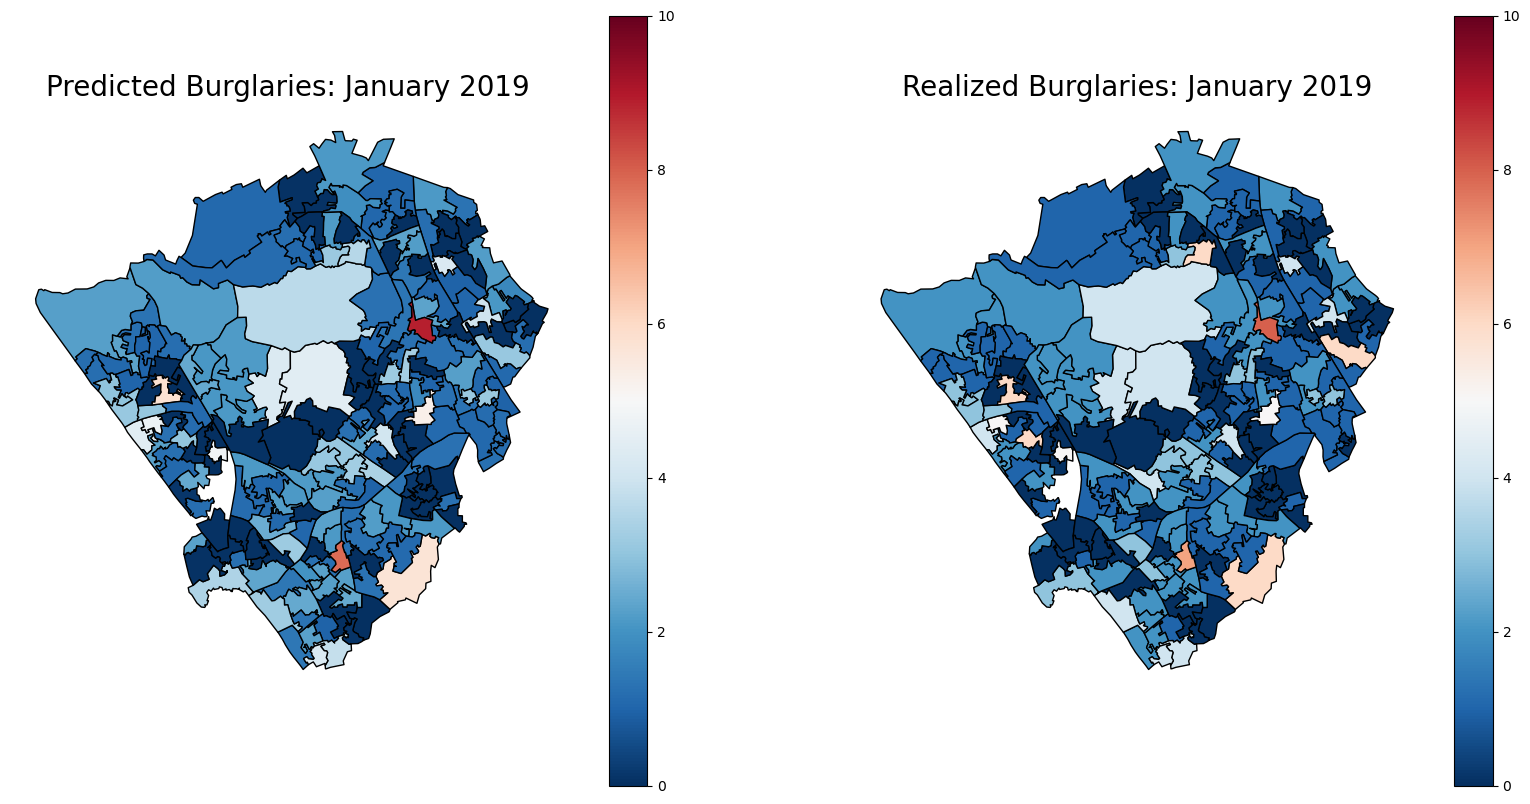

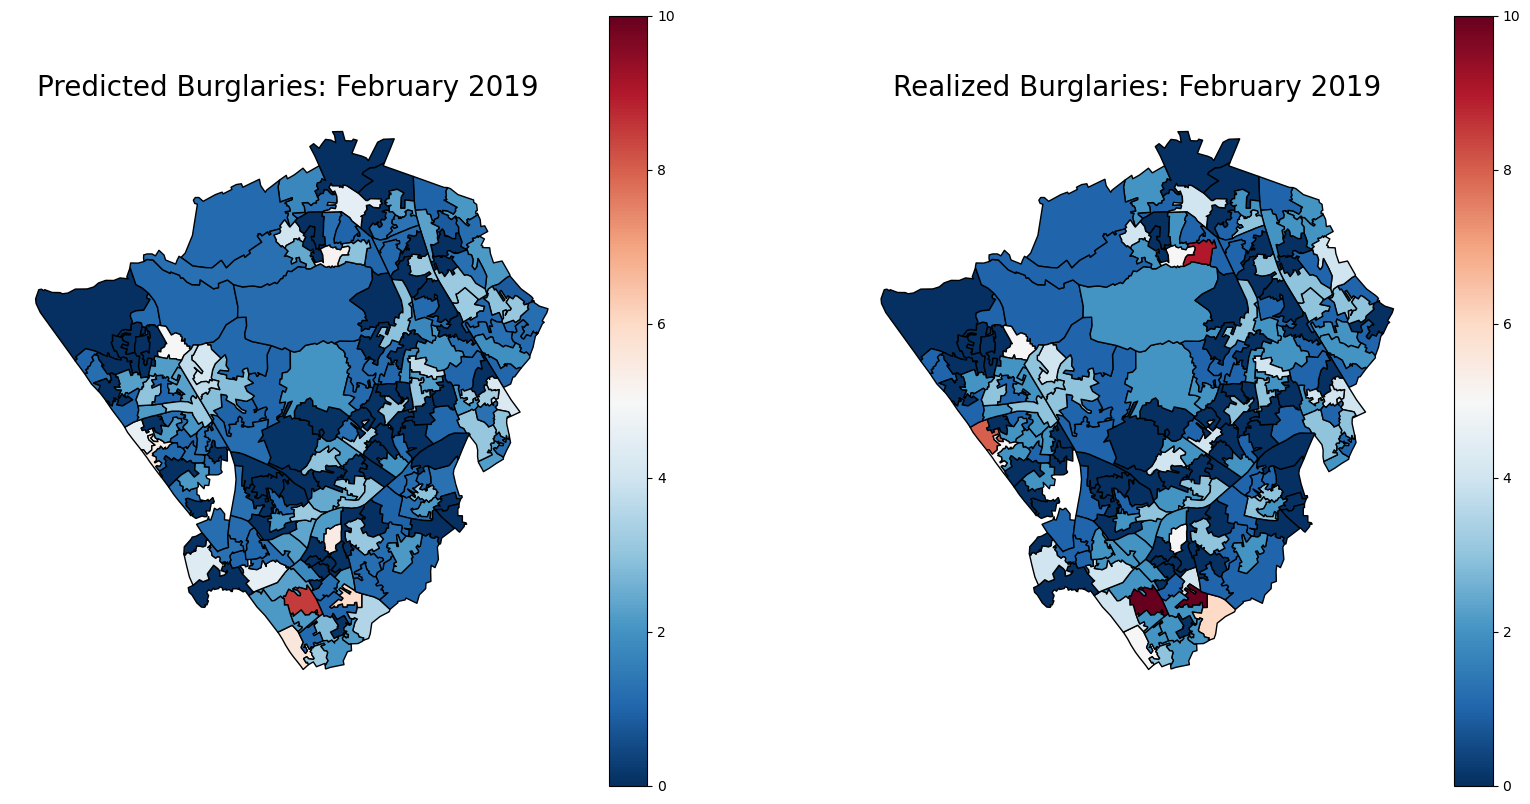

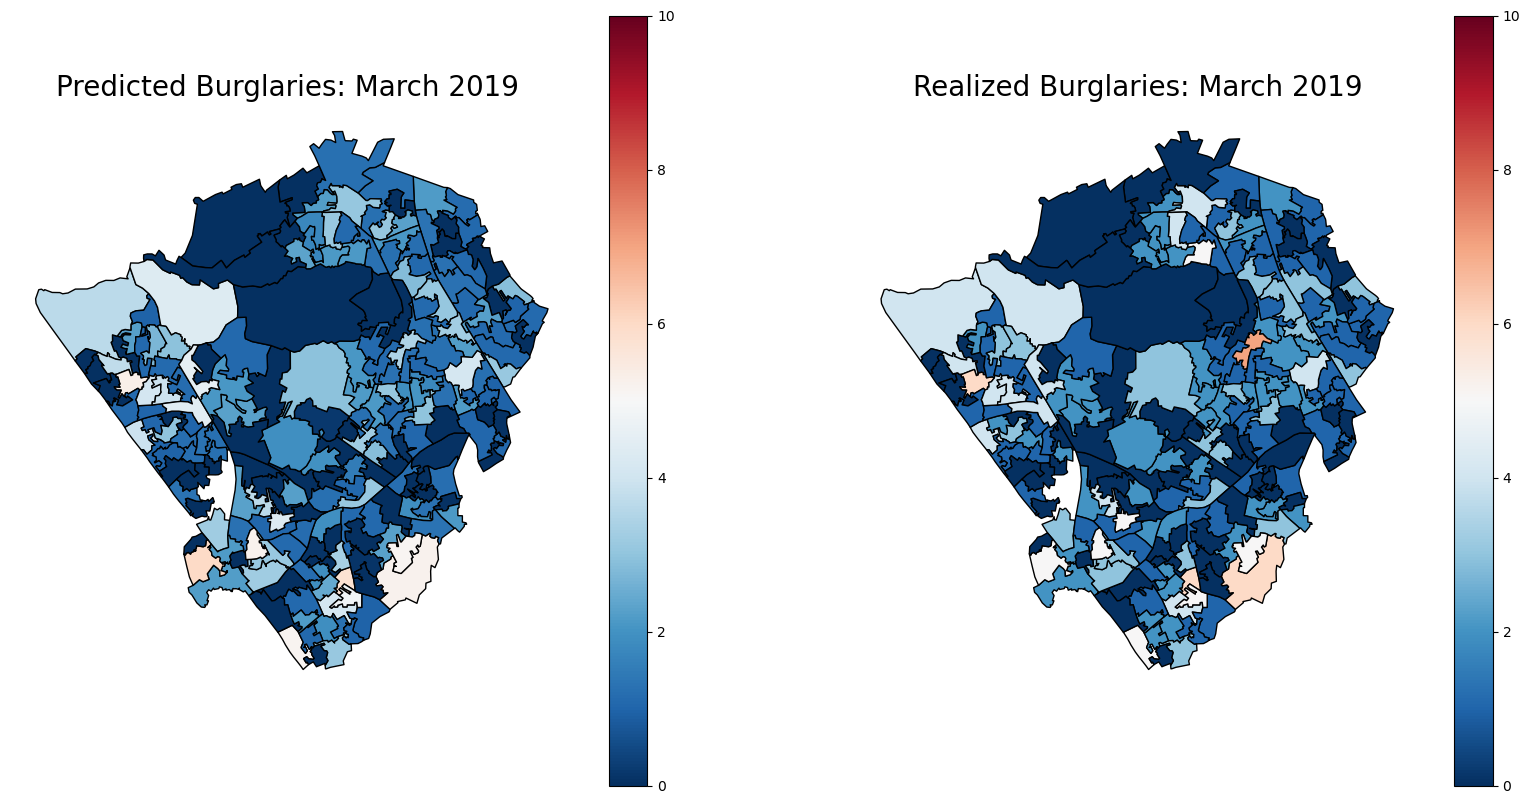

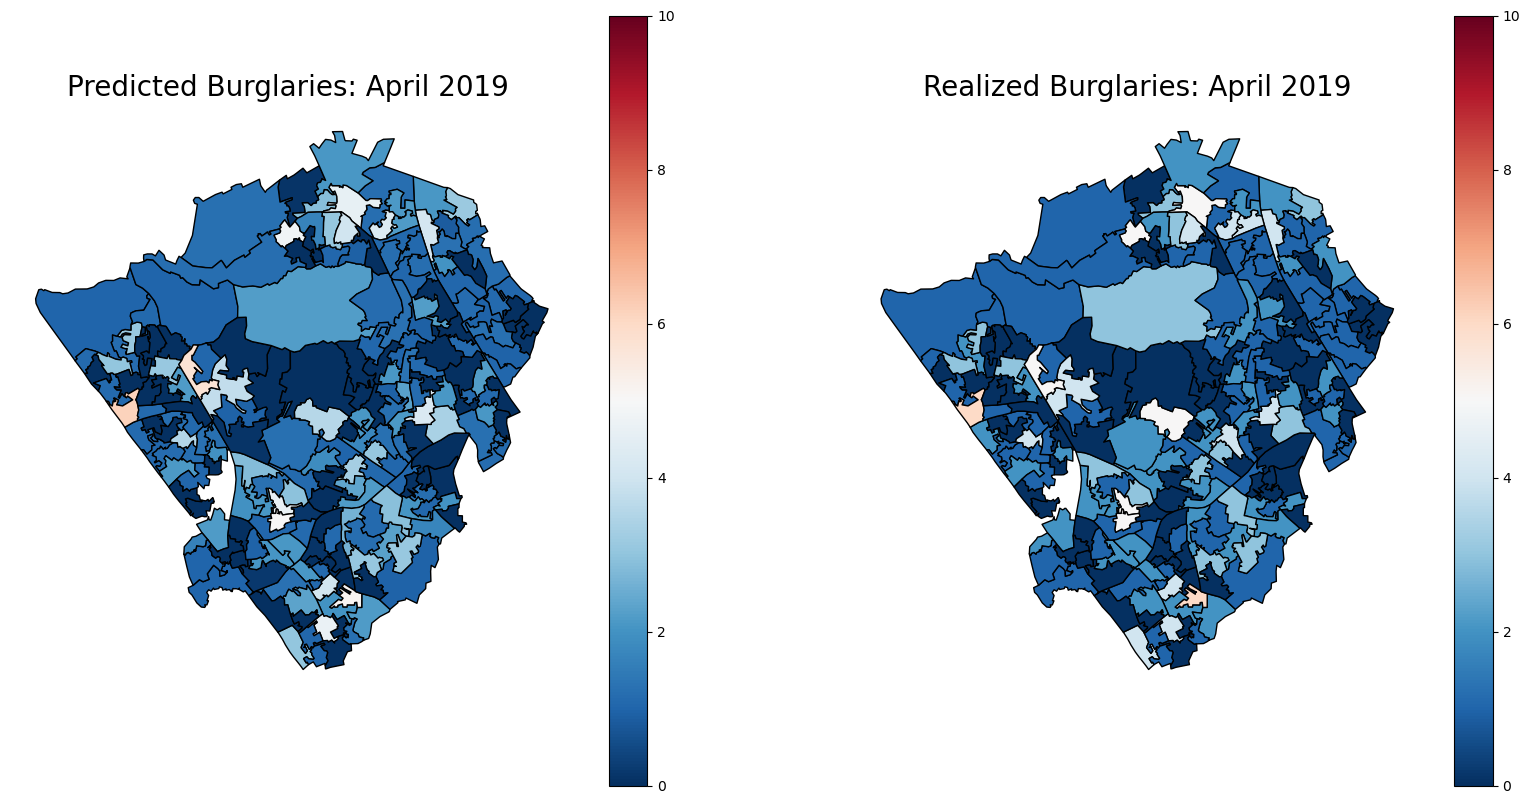

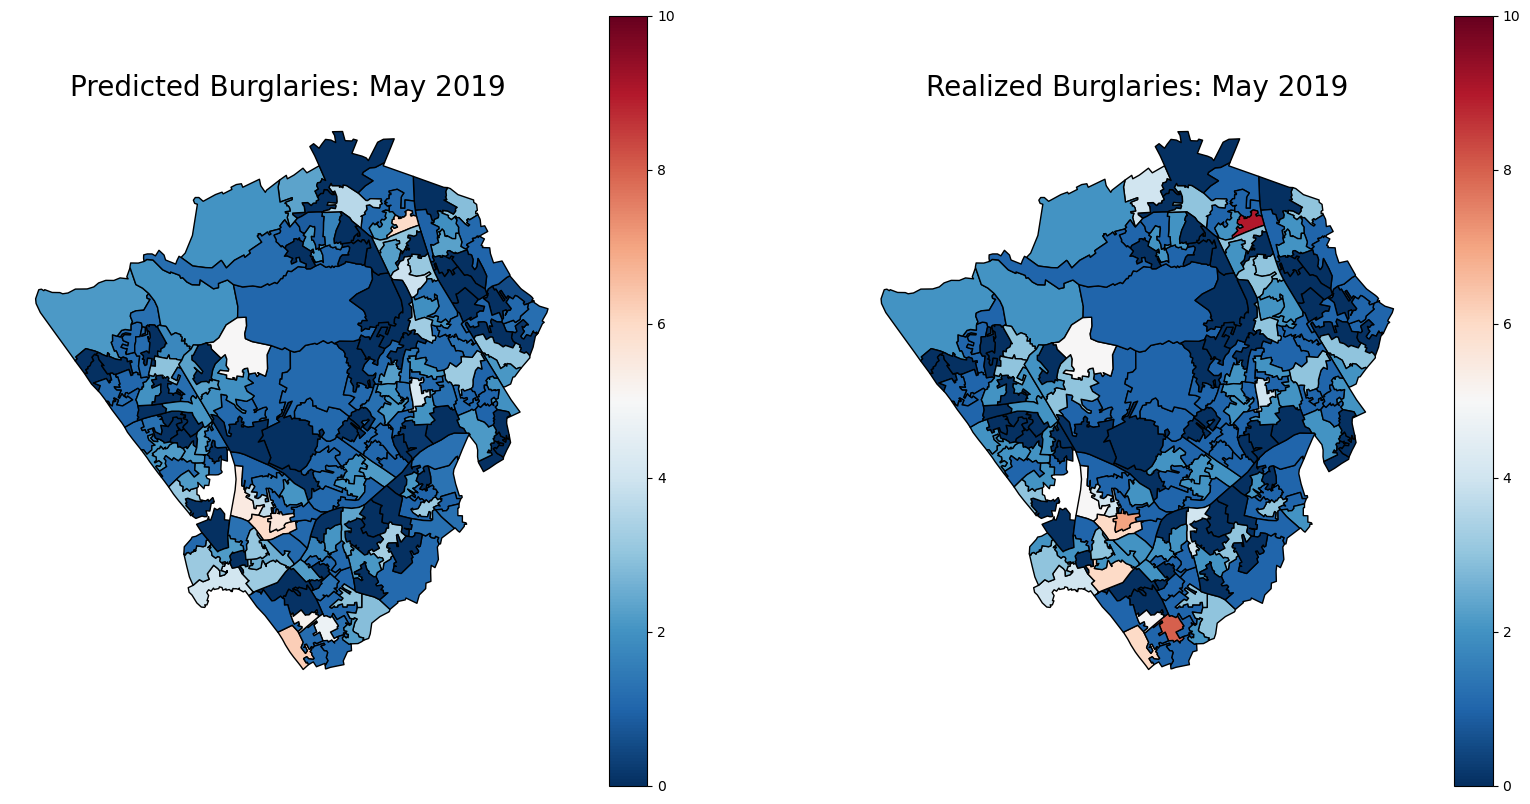

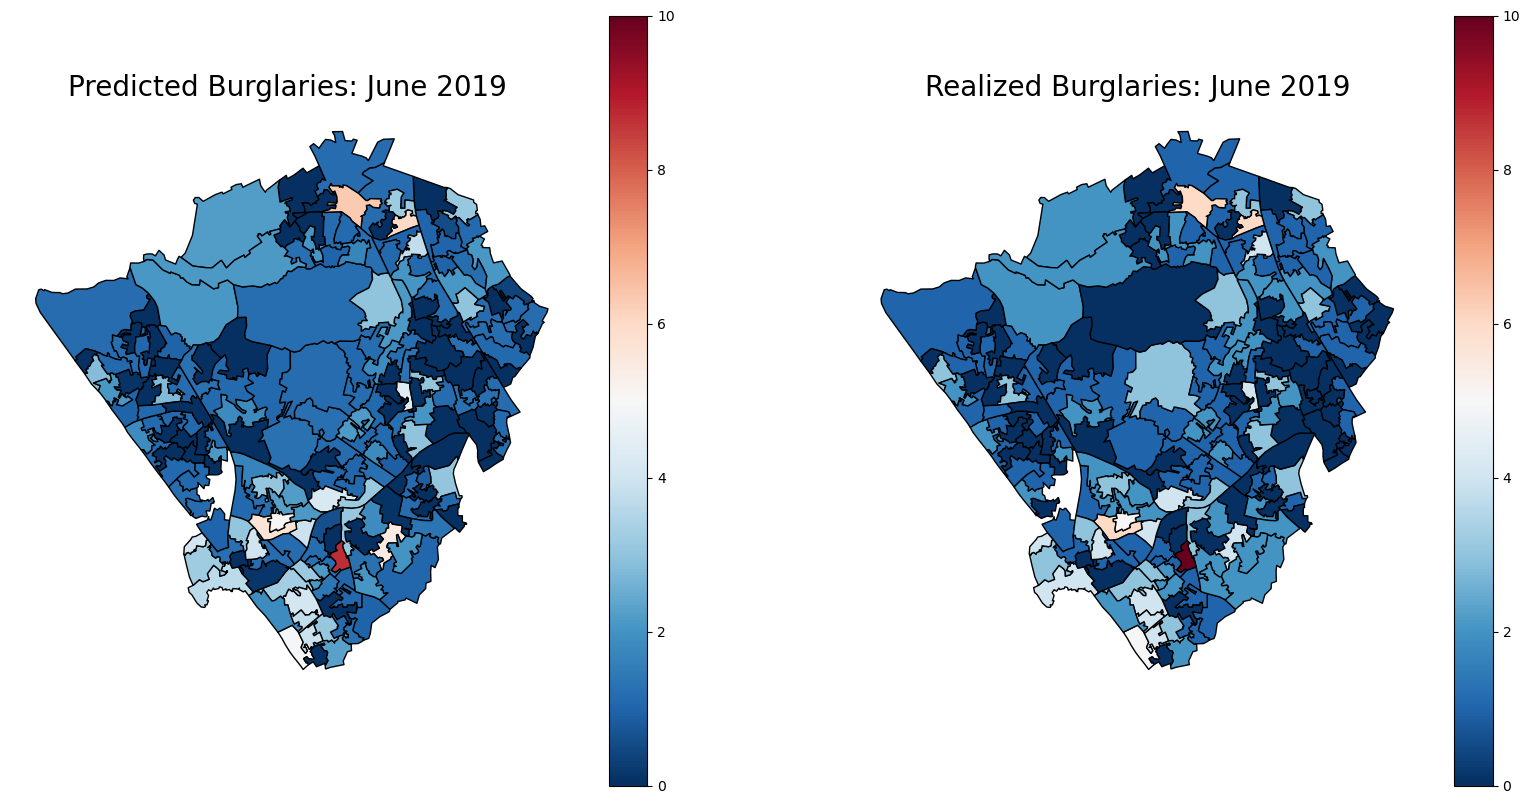

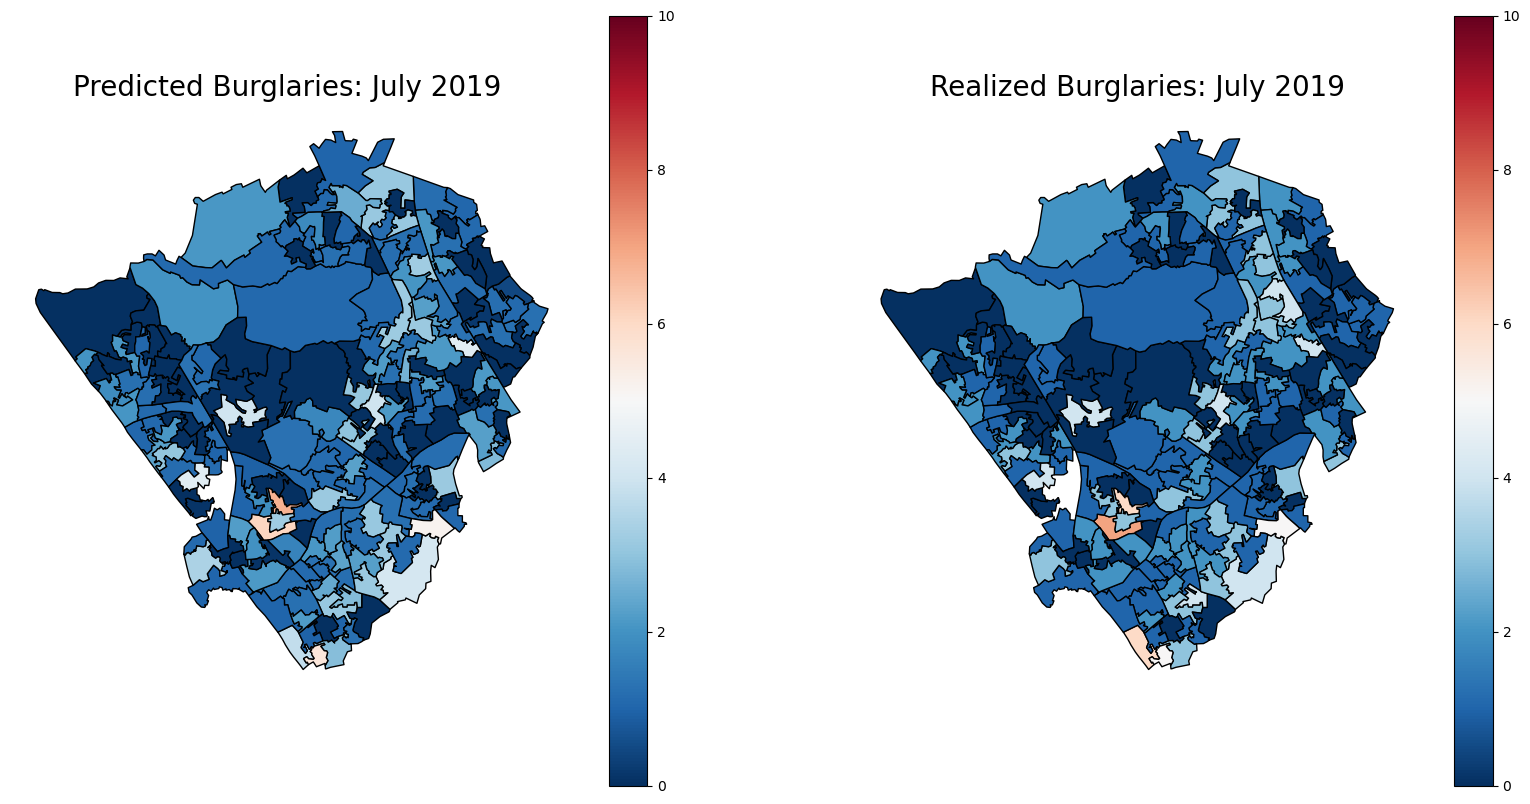

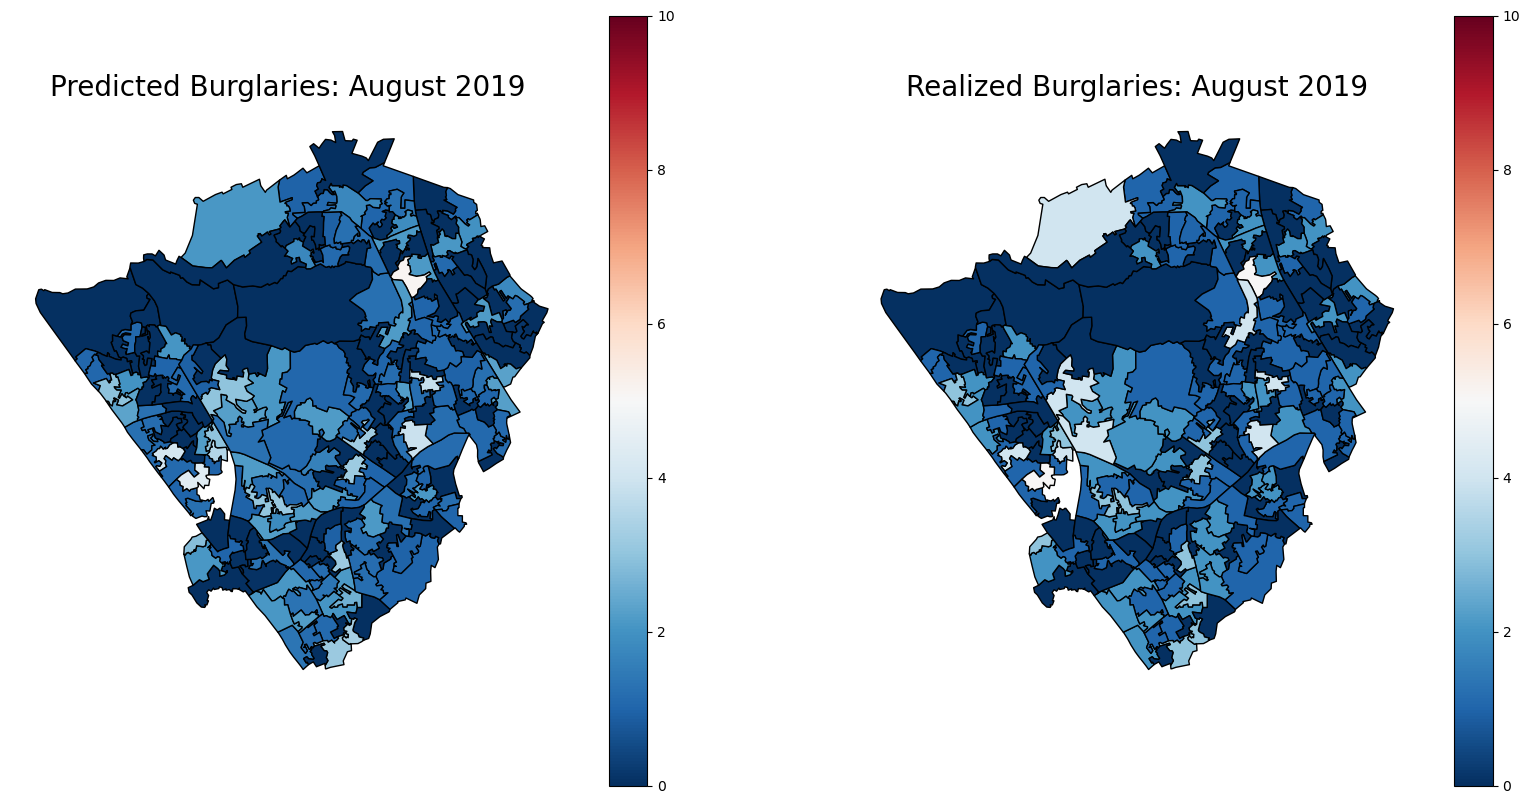

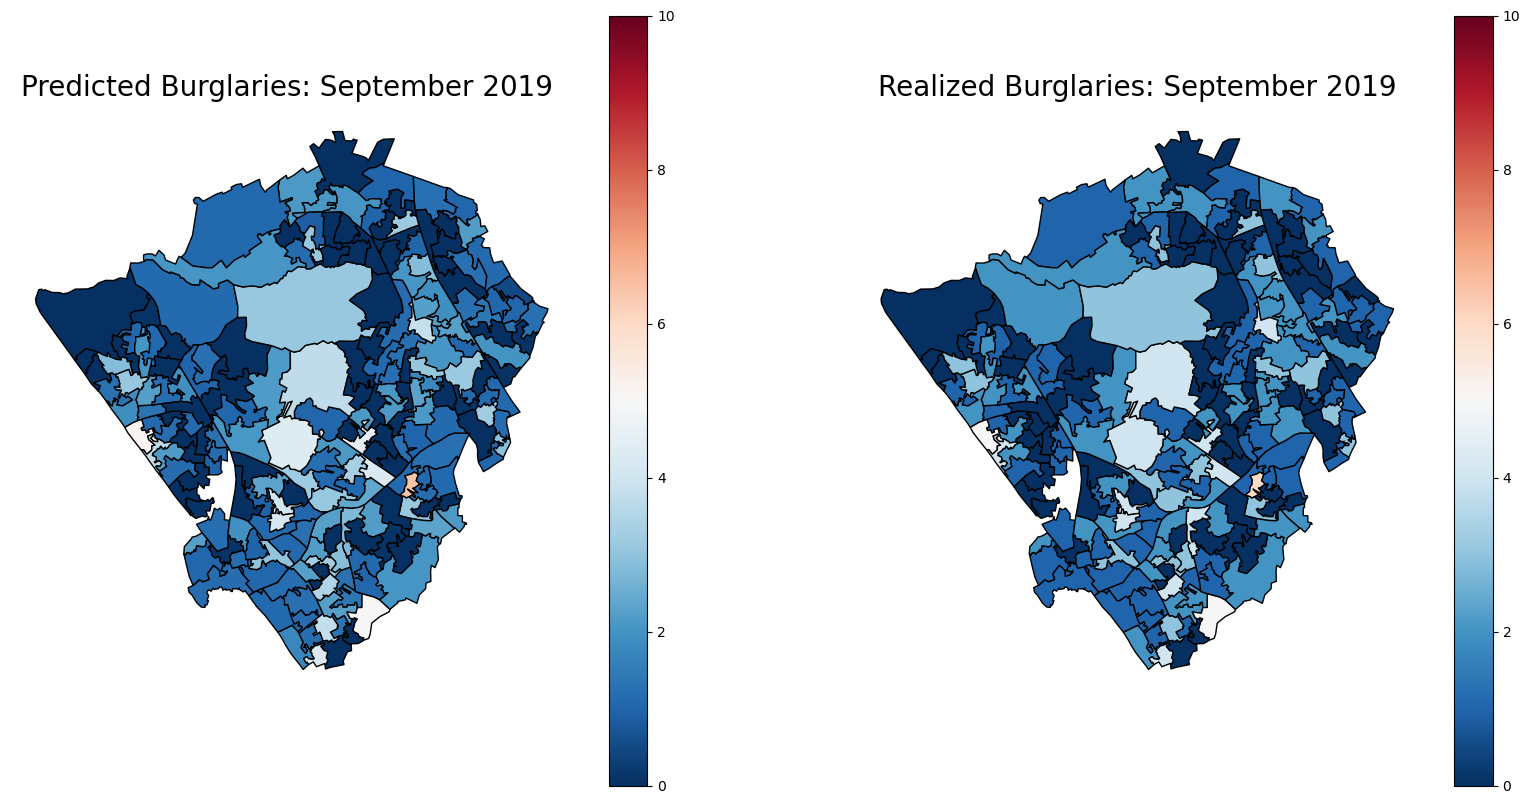

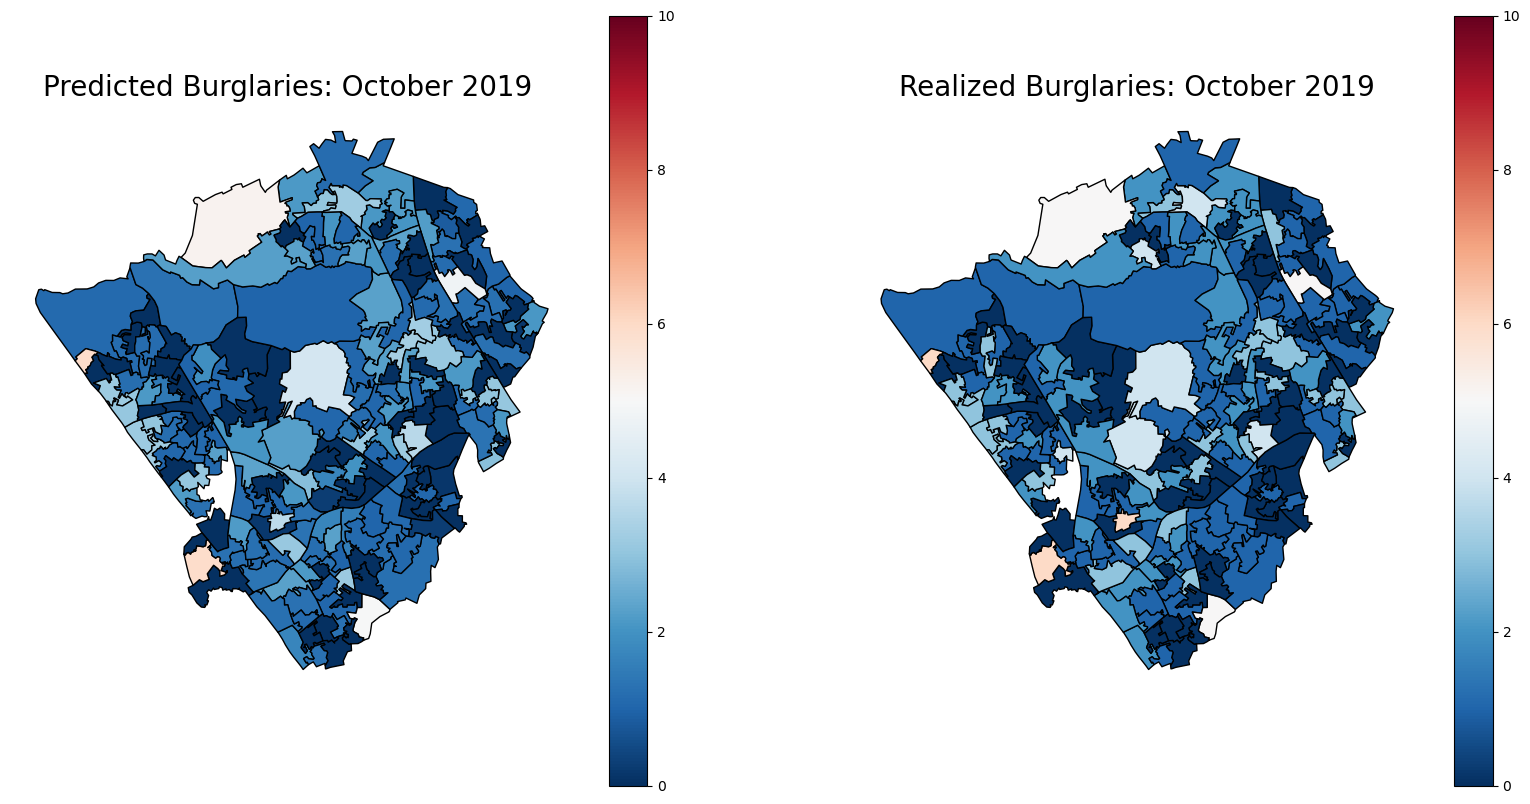

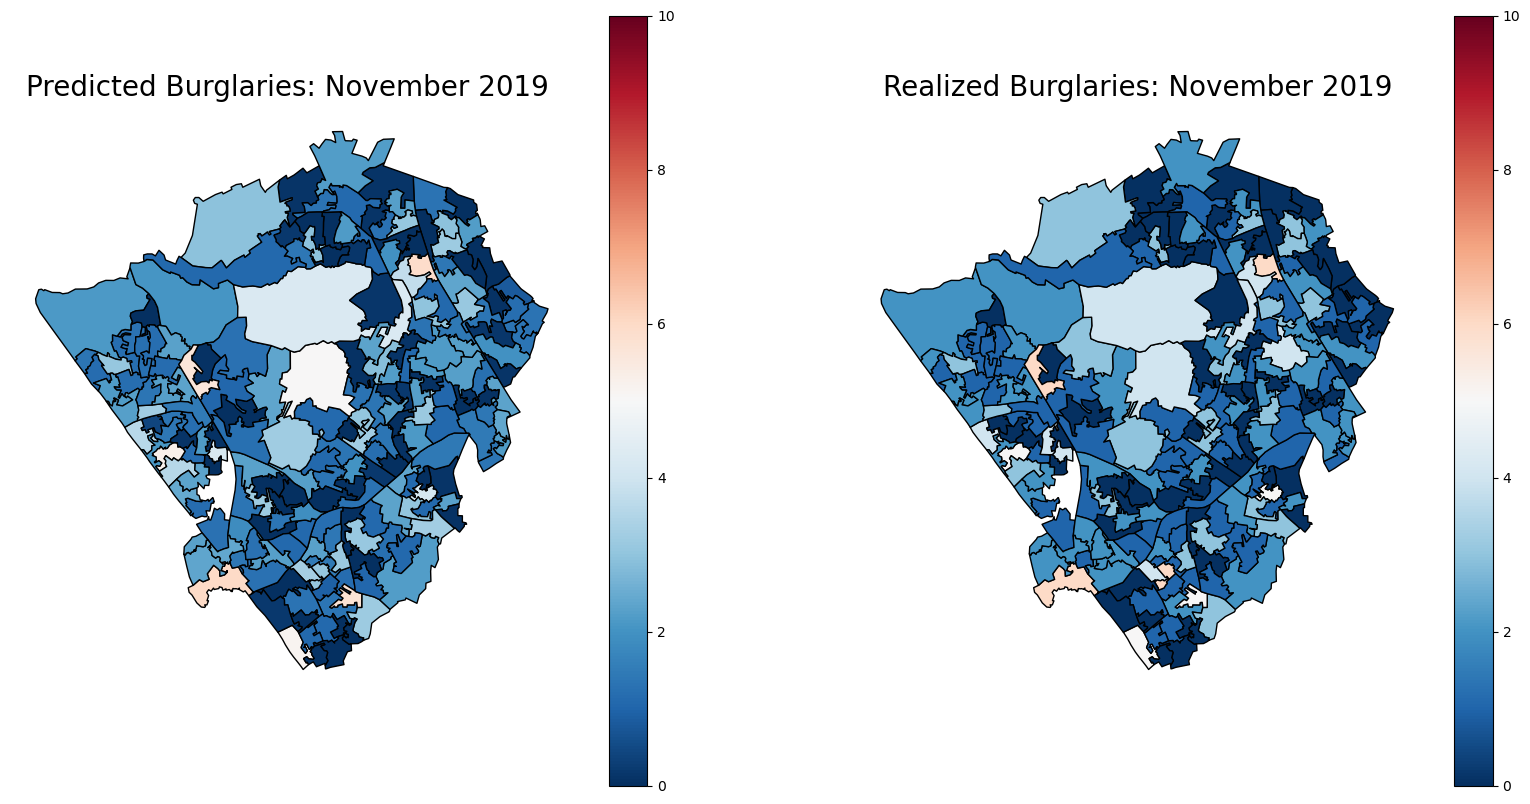

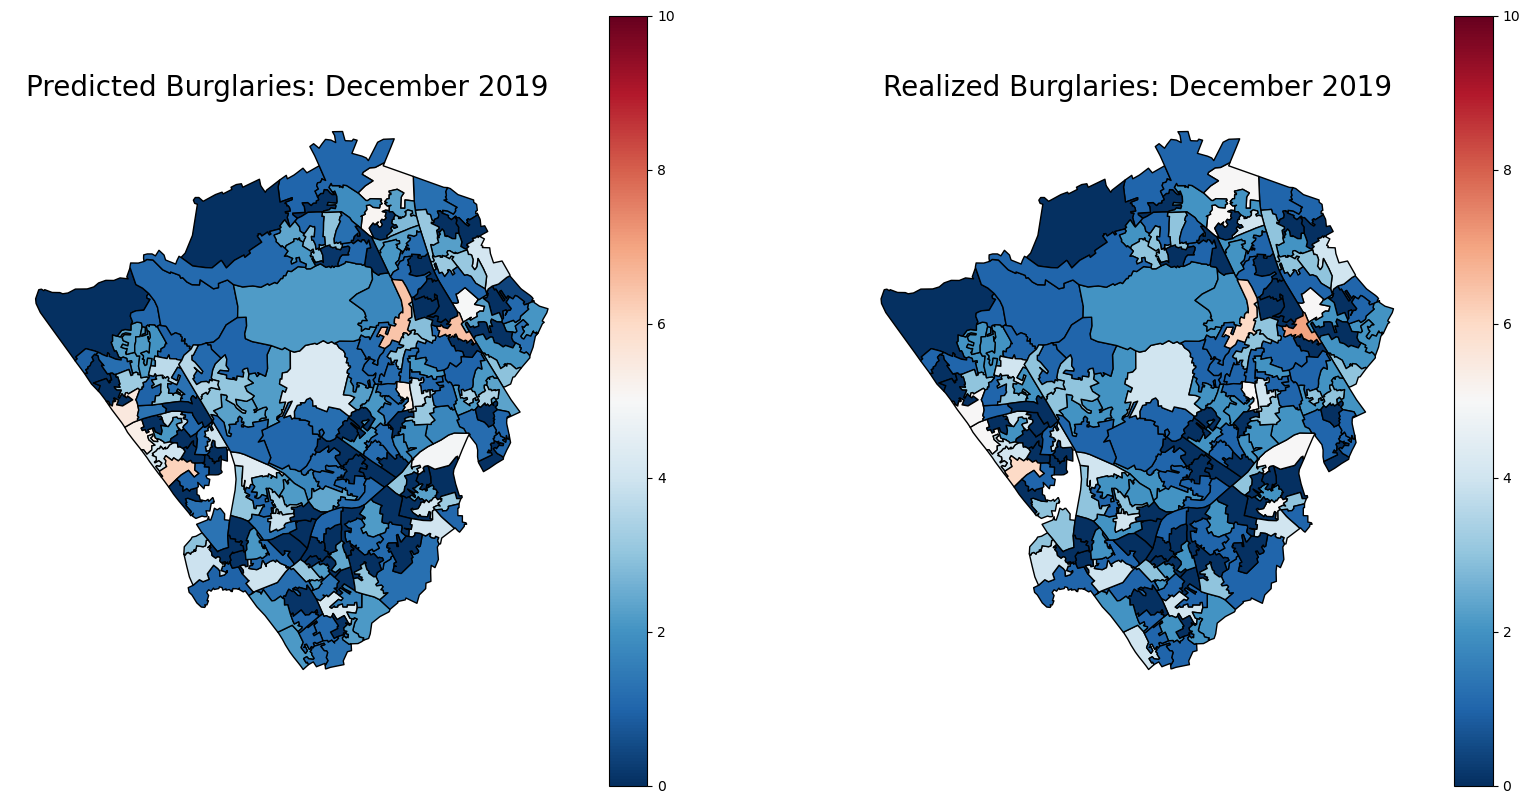

In [18]:
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
cwd = Path.cwd()
dc2 = cwd.parent
predSide = dc2.joinpath("data/img/predSide")
frames = []
for month in preDF["Month"].unique():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

    filtered = preDF[preDF["Month"]==month]
    merged = pd.merge(barnet_map, filtered, on=["LSOA code"])
    # merged.plot(column="Prediction", cmap="RdBu_r", edgecolors="black", vmin=0, vmax=15, legend=True, norm=plt.Normalize(vmin=0, vmax=15), ax=ax1)
    merged.plot(column="Prediction", cmap="RdBu_r", edgecolors="black", vmin=0, vmax=10, legend=True, ax=ax1)
    ax1.set_title(f"Predicted Burglaries: {month_dictionary[pd.to_datetime(month).month]} {pd.to_datetime(month).year} ", fontsize=20)

    merged.plot(column="Total Burglaries", cmap="RdBu_r", edgecolors="black", vmin=0, vmax=10, legend=True, ax= ax2)
    # merged.plot(column="Total Burglaries", cmap="RdBu_r", edgecolors="black", vmin=0, vmax=15, legend=True, norm=plt.Normalize(vmin=0, vmax=15), ax= ax2)

    ax1.axis("off")
    ax2.set_title(f"Realized Burglaries: {month_dictionary[pd.to_datetime(month).month]} {pd.to_datetime(month).year}", fontsize=20)
    ax2.axis("off")
    chart = fig.get_figure()
    frames.append(predSide.joinpath(f"{month}.png"))
    chart.savefig(predSide.joinpath(f"{month}"))



In [19]:
fs = []
for file in frames:
    image = Image.open(file)
    fs.append(image)
fs[0].save(predSide.joinpath("sideGif.gif"), format="GIF", append_images=fs[1:], save_all=True, duration=1000, loop=0)